-------------------------------------------------------------------
# Collaborative Filtering

## User based filtering
measure the similarity between target users and other users

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
# Similarity
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
book_df = pd.read_csv('./Books.csv', low_memory=False)

ratings_df = pd.read_csv('./Ratings.csv')
user_df = pd.read_csv('./Users.csv')

user_rating_df = ratings_df.merge(user_df, left_on = 'User-ID', right_on = 'User-ID')

In [19]:
user_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1149780 non-null  int64  
 1   ISBN         1149780 non-null  object 
 2   Book-Rating  1149780 non-null  int64  
 3   Location     1149780 non-null  object 
 4   Age          840288 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 52.6+ MB


In [18]:
user_rating_df.head()

,User-ID,ISBN,Book-Rating,Location,Age
0,276725,034545104X,0,"tyler, texas, usa",NaN
1,276726,0155061224,5,"seattle, washington, usa",NaN
2,276727,0446520802,0,"h, new south wales, australia",16.0
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0


In [22]:
print('The unique ratings are', sorted(user_rating_df['Book-Rating'].unique()))

The unique ratings are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [15]:
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [21]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


## Data exploration

In [35]:
agg_ratings = user_rating_df.groupby('ISBN').agg(mean_rating = ('Book-Rating', 'mean'),
                                                number_of_ratings = ('Book-Rating', 'count')).reset_index()
# Keep the movies with over 100 ratings
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>=5]
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43765 entries, 44 to 340194
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               43765 non-null  object 
 1   mean_rating        43765 non-null  float64
 2   number_of_ratings  43765 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [36]:
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>=10]
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18319 entries, 62 to 339882
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               18319 non-null  object 
 1   mean_rating        18319 non-null  float64
 2   number_of_ratings  18319 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 572.5+ KB


In [37]:
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>=50]
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2185 entries, 1913 to 330832
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               2185 non-null   object 
 1   mean_rating        2185 non-null   float64
 2   number_of_ratings  2185 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 68.3+ KB


In [41]:
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>=100]
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 3800 to 275963
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               731 non-null    object 
 1   mean_rating        731 non-null    float64
 2   number_of_ratings  731 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 22.8+ KB


In [42]:
agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False).head()

,ISBN,mean_rating,number_of_ratings
247408,0971880107,1.019584,2502
47371,0316666343,4.468726,1295
83359,0385504209,4.652322,883
9637,0060928336,3.448087,732
41007,0312195516,4.334716,723


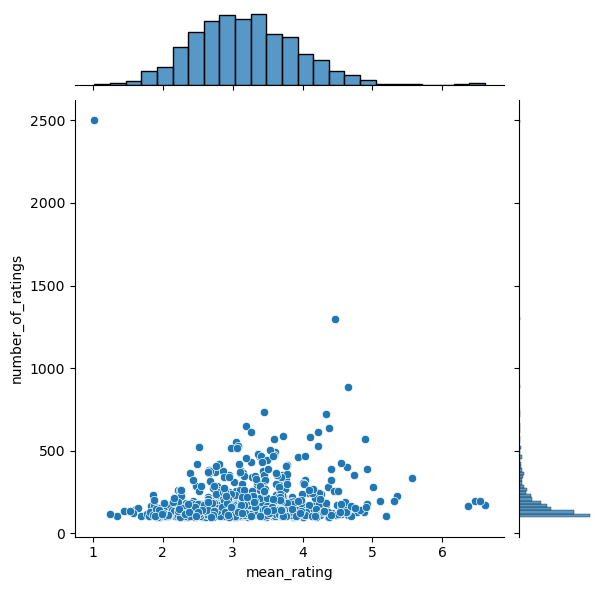

In [46]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT100)

## Data cleaning

In [51]:
agg_ratings_GT100.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 3800 to 275963
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               731 non-null    object 
 1   mean_rating        731 non-null    float64
 2   number_of_ratings  731 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 39.0+ KB


### cleaning data so we only have the 731 books that have ratings on books with books that have +100 ratings

In [68]:
#ratings_df = pd.read_csv('./Ratings.csv')
#user_df = pd.read_csv('./Users.csv')

#user_rating_df = ratings_df.merge(user_df, left_on = 'User-ID', right_on = 'User-ID')
df_GT100 = pd.merge(ratings_df, agg_ratings_GT100[['ISBN']], on='ISBN', how='inner')
df_GT100.info()
df_GT100.head()


#138461 ratings in total
#print(agg_ratings_GT100.number_of_ratings.sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138461 entries, 0 to 138460
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      138461 non-null  int64 
 1   ISBN         138461 non-null  object
 2   Book-Rating  138461 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.2+ MB


,User-ID,ISBN,Book-Rating
0,276727,0446520802,0
1,278418,0446520802,0
2,638,0446520802,0
3,3363,0446520802,0
4,7158,0446520802,10


In [75]:
print('The ratings dataset has', df_GT100['User-ID'].nunique(), 'unique users')
# Number of movies
print('The ratings dataset has', df_GT100['ISBN'].nunique(), 'unique movies')
# Number of ratings
print('The ratings dataset has', df_GT100['Book-Rating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(df_GT100['Book-Rating'].unique()))

The ratings dataset has 32712 unique users
The ratings dataset has 731 unique movies
The ratings dataset has 11 unique ratings
The unique ratings are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## User-Matrix

In [78]:
matrix = df_GT100.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating')
matrix.head()

AttributeError: 'DataFrame' object has no attribute 'table'

In [3]:
book_user_rating = book_df.merge(user_rating_df, left_on = 'ISBN',right_on = 'ISBN')
book_user_rating = book_user_rating[['ISBN', 'Book-Title', 'Book-Author', 'User-ID', 'Book-Rating']]
book_user_rating.reset_index(drop=True, inplace = True)

d ={}
for i,j in enumerate(book_user_rating.ISBN.unique()):
    d[j] =i
book_user_rating['unique_id_book'] = book_user_rating['ISBN'].map(d)

users_books_pivot_matrix_df = book_user_rating.pivot(index='User-ID', 
                                                          columns='unique_id_book', 
                                                          values='Book-Rating').fillna(0)

users_books_pivot_matrix_df.head()


users_books_pivot_matrix_df = users_books_pivot_matrix_df.values
users_books_pivot_matrix_df




array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
book_user_rating = book_df.merge(user_rating_df, left_on = 'ISBN',right_on = 'ISBN')
book_user_rating = book_user_rating[['ISBN', 'Book-Title', 'Book-Author', 'User-ID', 'Book-Rating']]
book_user_rating.reset_index(drop=True, inplace = True)

In [5]:
d ={}
for i,j in enumerate(book_user_rating.ISBN.unique()):
    d[j] =i
book_user_rating['unique_id_book'] = book_user_rating['ISBN'].map(d)

In [6]:
users_books_pivot_matrix_df = book_user_rating.pivot(index='User-ID', 
                                                          columns='unique_id_book', 
                                                          values='Book-Rating').fillna(0)

In [7]:
users_books_pivot_matrix_df.head()


unique_id_book,0,1,2,3,4,5,6,7,8,9,...,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363
User-ID,,,,,,,,,,,,,,,,,,,,,
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
users_books_pivot_matrix_df = users_books_pivot_matrix_df.values
users_books_pivot_matrix_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [10]:
from scipy.sparse.linalg import svds

NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_books_pivot_matrix_df, k = NUMBER_OF_FACTORS_MF)

In [11]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [12]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 1.51321481e-31,  1.76032408e-46,  1.50722452e-32, ...,
         0.00000000e+00,  0.00000000e+00, -8.90585137e-33],
       [ 6.91352149e-34, -4.11836668e-49,  4.14677690e-35, ...,
         0.00000000e+00,  0.00000000e+00, -2.94248719e-35],
       [ 3.16433247e-32,  3.40393525e-47, -5.35632140e-33, ...,
         0.00000000e+00,  0.00000000e+00,  2.18892948e-32],
       ...,
       [-2.98945390e-31, -2.45216815e-46, -3.07051187e-32, ...,
         0.00000000e+00,  0.00000000e+00,  1.86140042e-32],
       [-1.95639182e-32, -1.37777163e-47,  3.16459052e-33, ...,
         0.00000000e+00,  0.00000000e+00, -1.24865116e-32],
       [-3.29862152e-31, -6.03463862e-47, -5.51783319e-33, ...,
         0.00000000e+00,  0.00000000e+00,  6.16833317e-32]])

In [13]:
def top_cosine_similarity(data, book_id, top_n=10):
    index = book_id 
    book_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(book_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

def similar_books(book_user_rating, book_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    book_user_rating[book_user_rating.unique_id_book == book_id]['Book-Title'].values[0]))
    for id in top_indexes + 1:
        print(book_user_rating[book_user_rating.unique_id_book == id]['Book-Title'].values[0])

In [14]:
k = 50
movie_id =25954  
top_n = 3
sliced = Vt.T[:, :k] # representative data

similar_books(book_user_rating, 25954, top_cosine_similarity(sliced, movie_id, top_n))

IndexError: index 25954 is out of bounds for axis 0 with size 3364

## Item based filtering

Measuring the similarity between the books that users rates with and other users books ratings

## Single Value- / UV-Decomposition